## Projeto - Análise Exploratória em Conjuntos de Dados do Kaggle

DataSet [aqui](https://www.kaggle.com/orgesleka/used-cars-database#).

### Análise 3

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

from datetime import datetime

# Matplotlib
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "data/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


**Calcule a média do preço por marca de carro**

In [5]:
aux = pd.DataFrame()
for x in list(df["brand"].unique()):
    for y in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == x) & (df["vehicleType"] == y)]["price"].mean()
        aux = aux.append(pd.DataFrame({'brand':x,'vehicleType':y,'avgPrice':z}, index =[0]))
aux = aux.reset_index()
del aux ["index"]
aux["avgPrice"].fillna(0, inplace=True)
aux["avgPrice"].isnull().value_counts()
aux["avgPrice"] = aux["avgPrice"].astype(int)
aux.head(10)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743
5,volkswagen,cabrio,5784
6,volkswagen,kombi,3902
7,volkswagen,bus,5881
8,volkswagen,andere,2597
9,audi,Other,1012


**Preço médio de veículo por marca, bem como o tipo de veículo**

Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo

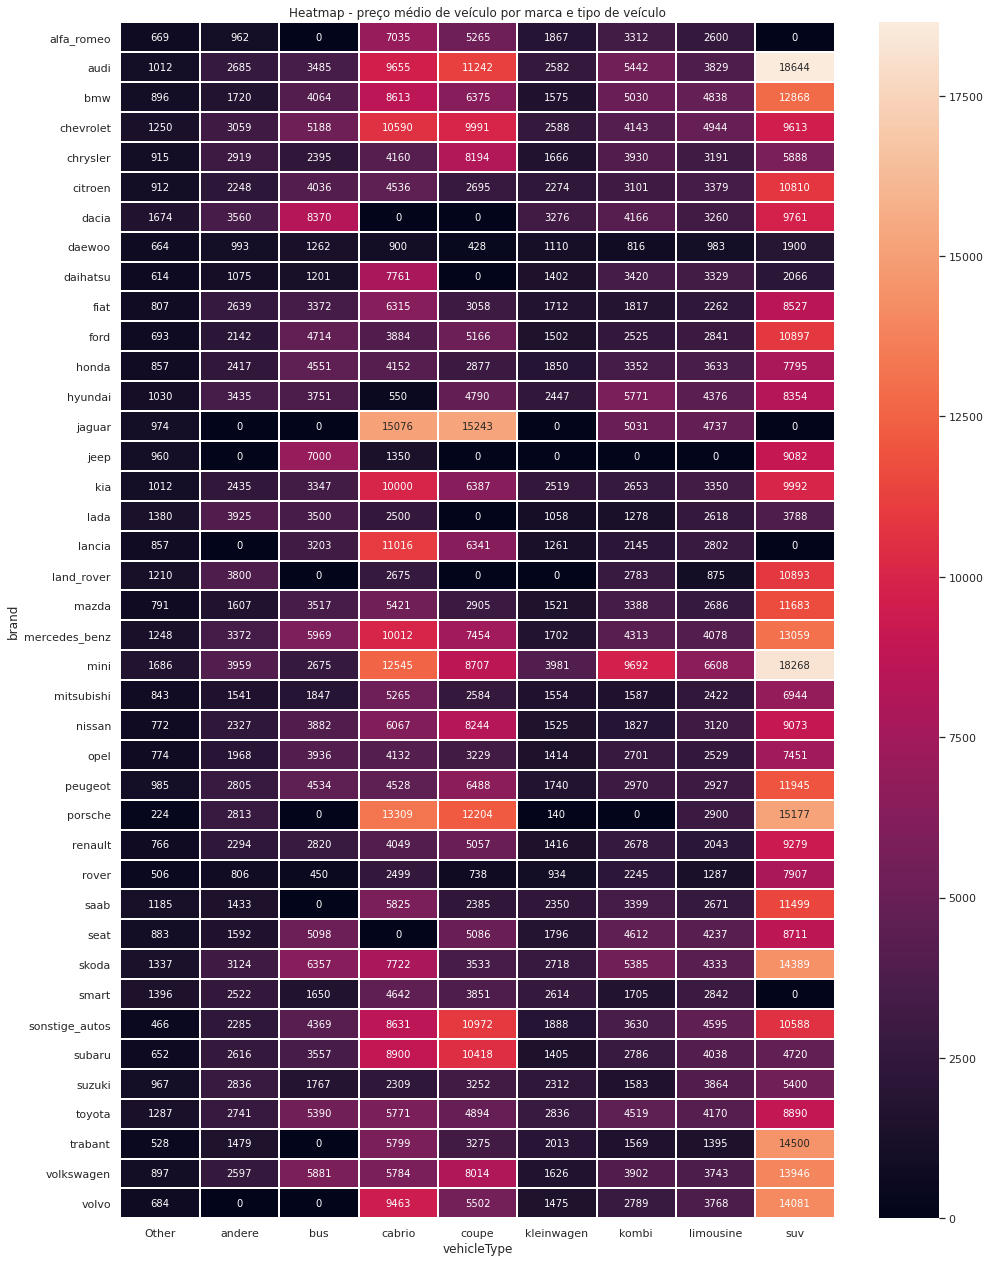

In [6]:
aux = aux.pivot("brand", "vehicleType","avgPrice")
fig, ax = plt.subplots(figsize=(16,22))
sns.heatmap(aux, linewidths=1,annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - preço médio de veículo por marca e tipo de veículo")
plt.show()